<a href="https://colab.research.google.com/github/zyf2021/-/blob/main/%D0%9C%D0%9C%D0%91%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Вариант 17 (Филонова)**

Конкретные количественные показатели цены и зависящие от неё величины спроса и предложения имеют вид временного ряда, представленного в таблице 1.

**СЛАУ решить методом Зейделя**


###Установка библиотек

In [60]:
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from shapely.geometry import LineString

###Исходные данные

####Q1

In [7]:
price = [float(x) for x in '1 2 3 4 5 6 7 8 9 10'.split()]
query = [float(x) for x in '2.55	4.66	5.89	4.62	3.35	7.55	4.12	6.45	5.95	4.27'.split('	')]
supply = [float(x) for x in '2.25	2.55	5.25	5.15	5.05	7.86	5.12	0.25	2.44	3.58'.split('	')]
data = list()
data.extend([price, query, supply])
data

[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 [2.55, 4.66, 5.89, 4.62, 3.35, 7.55, 4.12, 6.45, 5.95, 4.27],
 [2.25, 2.55, 5.25, 5.15, 5.05, 7.86, 5.12, 0.25, 2.44, 3.58]]

####Q + 20%

In [1]:
price_20 = [float(x) for x in '1 2 3 4 5 6 7 8 9 10'.split()]
query_20 = [float(x) for x in '2.55	4.66	5.89	4.62	3.35	7.55	4.12	6.45	5.95	4.27'.split('	')]
query_20 = [1.2*el for el in query_20]
supply_20 = [float(x) for x in '2.25	2.55	5.25	5.15	5.05	7.86	5.12	0.25	2.44	3.58'.split('	')]
data_20 = list()
data_20.extend([price_20, query_20, supply_20])
data_20

[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 [3.0599999999999996,
  5.592,
  7.068,
  5.544,
  4.02,
  9.059999999999999,
  4.944,
  7.74,
  7.14,
  5.124],
 [2.25, 2.55, 5.25, 5.15, 5.05, 7.86, 5.12, 0.25, 2.44, 3.58]]

####Q + 40%

In [2]:
price_40 = [float(x) for x in '1 2 3 4 5 6 7 8 9 10'.split()]
query_40 = [float(x) for x in '2.55	4.66	5.89	4.62	3.35	7.55	4.12	6.45	5.95	4.27'.split('	')]
query_40 = [1.4*el for el in query_20]
supply_40 = [float(x) for x in '2.25	2.55	5.25	5.15	5.05	7.86	5.12	0.25	2.44	3.58'.split('	')]
data_40 = list()
data_40.extend([price_40, query_40, supply_40])
data_40

[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 [4.283999999999999,
  7.828799999999999,
  9.895199999999999,
  7.761599999999999,
  5.627999999999999,
  12.683999999999997,
  6.9216,
  10.836,
  9.995999999999999,
  7.173599999999999],
 [2.25, 2.55, 5.25, 5.15, 5.05, 7.86, 5.12, 0.25, 2.44, 3.58]]

###Расчет графиков

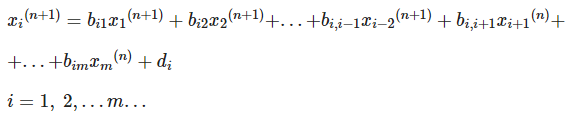

In [11]:
def A_price(price, power):
  s = sum([p**power for p in price])
  return s
def b_query(query, price, power):
  s = sum([query[i] * price[i]**power for i in range(len(query))])
  return s

def Zeidel(A, b, x, m=10, eps = 0.01, times=1000):
  k = 0
  converge = False
  #x_new = x
  while not converge:
    x_new = np.copy(x)
    for i in range(m):
      s1 = sum(A[i][j] * x_new[j] for j in range(i))
      #print((b[i] - s1) / A[i][i])
      s2 = sum(A[i][j] * x[j] for j in range(i + 1, m))
      x_new[i] = (b[i] - s1 - s2) / A[i][i]
    converge = np.max(np.abs(x_new - x)) <= eps
    #print(converge)
    #print(np.max(np.abs(x_new - x)))
    x = x_new
    k += 1
    if k >= times:
      break
    
  print('Коэффициенты', x)
  print('Количество итераций', k)
  return x

In [39]:
np.set_printoptions(precision=5, suppress=True)

m = 10 # число коэффициентов

# Расчет матрицы А
A = np.zeros((m,m)) # price, то есть известный x 
for i in range(m):
  for j in range(m):
    A[i][j] = A_price(data[0], i+j)

# Расчет матрицы b для исходного спроса Q
b_Q = np.zeros(m) # Q - свободные члены
for i in range(m):
  b_Q[i] = b_query(data[1], data[0], i)

# Расчет матрицы b для повышенного на 20% спроса Q
b_Q_20 = np.zeros(m) # Q - свободные члены
for i in range(m):
  b_Q_20[i] = b_query(data_20[1], data_20[0], i)

# Расчет матрицы b для повышенного на 40% спроса Q
b_Q_40 = np.zeros(m) # Q - свободные члены
for i in range(m):
  b_Q_40[i] = b_query(data_40[1], data_40[0], i)

# Расчет матрицы b для исходного предложения S
b_S = np.zeros(m) # Q - свободные члены
for i in range(m):
  b_S[i] = b_query(data[2], data[0], i)

x = np.zeros(m)

x_query_pred = Zeidel(A, b_Q, x, m = 10, eps = 0.01)
x_query_pred_20 = Zeidel(A, b_Q_20, x, m = 10, eps = 0.01)
x_query_pred_40 = Zeidel(A, b_Q_40, x, m = 10, eps = 0.01)
x_supply_pred = Zeidel(A, b_S, x, m = 10, eps = 0.01)

# Расчет предсказаных значений спроса Q
query_pred = np.zeros(len(query))
for i in range(len(query_pred)):
  query_pred[i] = sum([x_query_pred[j]*price[i]**(j) for j in range(len(x_query_pred))])

# Расчет предсказаных значений для повышенного на 20% спроса Q
query_20_pred = np.zeros(len(query))
for i in range(len(query_pred)):
  query_20_pred[i] = sum([x_query_pred_20[j]*price[i]**(j) for j in range(len(x_query_pred_20))])

# Расчет предсказаных значений для повышенного на 40% спроса Q
query_40_pred = np.zeros(len(query))
for i in range(len(query_pred)):
  query_40_pred[i] = sum([x_query_pred_40[j]*price[i]**(j) for j in range(len(x_query_pred_40))])

# Расчет предсказаных значений предложения S
supply_pred = np.zeros(len(query))
for i in range(len(query_pred)):
  supply_pred[i] = sum([x_supply_pred[j]*price[i]**(j) for j in range(len(x_supply_pred))])

print(supply_pred)

Коэффициенты [ 3.24287  0.37806  0.00531  0.00004 -0.00002 -0.      -0.      -0.
 -0.      -0.     ]
Количество итераций 25
Коэффициенты [ 3.88184  0.45517  0.00626  0.00006 -0.00002 -0.00001 -0.      -0.
 -0.      -0.     ]
Количество итераций 26
Коэффициенты [ 5.41409  0.64037  0.00843  0.00012 -0.00003 -0.00001 -0.      -0.
 -0.      -0.     ]
Количество итераций 28
Коэффициенты [-0.30911  2.20752 -0.10184 -0.0135  -0.00082 -0.00003  0.       0.
  0.       0.     ]
Количество итераций 162
[1.78222 3.57674 4.962   5.80872 5.98845 5.4189  4.15906 2.58653 1.70119
 3.614  ]


###Построение графиков

POINT (3.9488381385603057 5.7654022924489094)


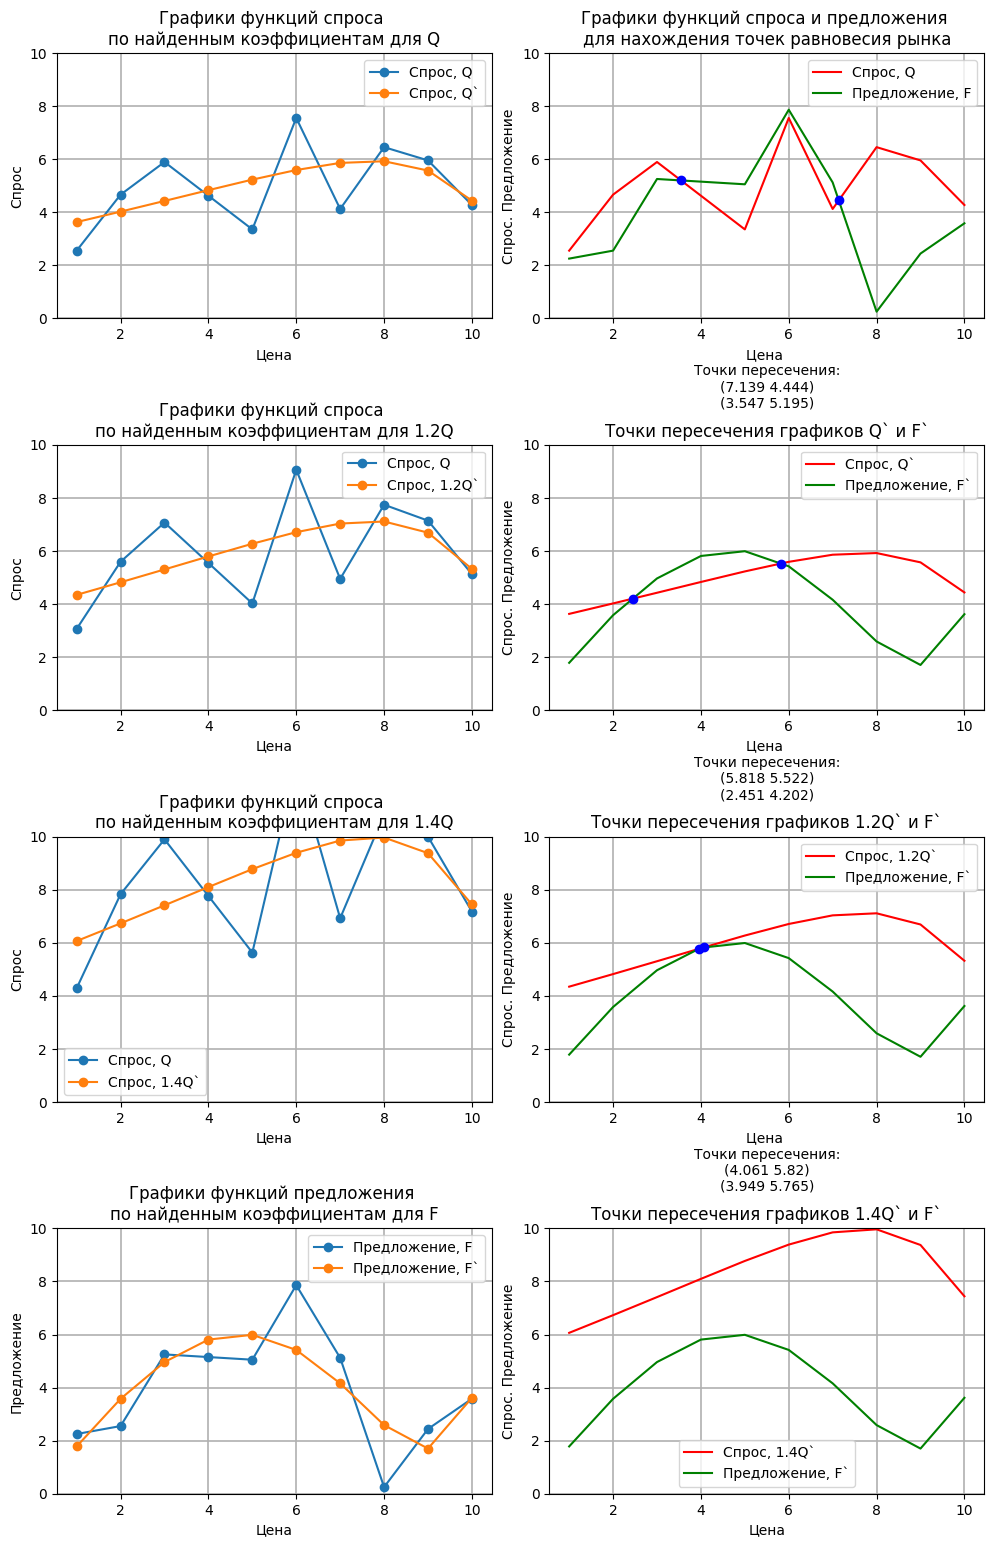

In [70]:
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

fig.tight_layout(h_pad=7)


axs[0,0].set_title('Графики функций спроса \nпо найденным коэффициентам для Q')
axs[0,0].set_xlabel('Цена')
axs[0,0].set_ylabel('Спрос')
axs[0,0].grid(which='major', linewidth=1.2)
axs[0,0].plot(data[0], data[1], 'o-', label='Спрос, Q')
axs[0,0].plot(price, query_pred, 'o-', label='Спрос, Q`')
axs[0,0].legend()
axs[0,0].set_ylim([0, 10])

axs[1,0].set_title('Графики функций спроса \nпо найденным коэффициентам для 1.2Q')
axs[1,0].set_xlabel('Цена')
axs[1,0].set_ylabel('Спрос')
axs[1,0].grid(which='major', linewidth=1.2)
axs[1,0].plot(data[0], data_20[1], 'o-', label='Спрос, Q')
axs[1,0].plot(price, query_20_pred, 'o-', label='Спрос, 1.2Q`')
axs[1,0].legend()
axs[1,0].set_ylim([0, 10])

axs[2,0].set_title('Графики функций спроса \nпо найденным коэффициентам для 1.4Q')
axs[2,0].set_xlabel('Цена')
axs[2,0].set_ylabel('Спрос')
axs[2,0].grid(which='major', linewidth=1.2)
axs[2,0].plot(data[0], data_40[1], 'o-', label='Спрос, Q')
axs[2,0].plot(price, query_40_pred, 'o-', label='Спрос, 1.4Q`')
axs[2,0].legend()
axs[2,0].set_ylim([0, 10])

axs[3,0].set_title('Графики функций предложения \nпо найденным коэффициентам для F')
axs[3,0].set_xlabel('Цена')
axs[3,0].set_ylabel('Предложение')
axs[3,0].grid(which='major', linewidth=1.2)
axs[3,0].plot(data[0], data[2], 'o-', label='Предложение, F')
axs[3,0].plot(price, supply_pred, 'o-', label='Предложение, F`')
axs[3,0].legend()
axs[3,0].set_ylim([0, 10])

axs[0,1].set_title('Графики функций спроса и предложения \nдля нахождения точек равновесия рынка')
axs[0,1].set_ylabel('Спрос. Предложение')
axs[0,1].grid(which='major', linewidth=1.2)
axs[0,1].plot(price, data[1], 'r', label='Спрос, Q')
axs[0,1].plot(price, data[2], 'g', label='Предложение, F')
axs[0,1].legend()
axs[0,1].set_ylim([0, 10])


line1 = LineString(np.column_stack((price, data[1])))
line2 = LineString(np.column_stack((price, data[2])))
if line2.intersects(line1):
  intersection = line2.intersection(line1)
  list_point = [el for el in map(lambda x: x.coords[0], intersection.geoms)]
  s = 'Точки пересечения:\n'
  for i in range(len(list_point)):
    axs[0,1].plot(list_point[i][0], list_point[i][1], 'bo')
    s += '(' + str(round(list_point[i][0],3)) + ' ' + str(round(list_point[i][1],3)) + ')\n'
axs[0,1].set_xlabel('Цена \n' + s)

axs[1,1].set_title('Точки пересечения графиков Q` и F`')
axs[1,1].set_ylabel('Спрос. Предложение')
axs[1,1].grid(which='major', linewidth=1.2)
axs[1,1].plot(price, query_pred, 'r', label='Спрос, Q`')
axs[1,1].plot(price, supply_pred, 'g', label='Предложение, F`')
axs[1,1].legend()
axs[1,1].set_ylim([0, 10])


line1 = LineString(np.column_stack((price, query_pred)))
line2 = LineString(np.column_stack((price, supply_pred)))
if line2.intersects(line1):
  intersection = line2.intersection(line1)
  list_point = [el for el in map(lambda x: x.coords[0], intersection.geoms)]
  s = 'Точки пересечения:\n'
  for i in range(len(list_point)):
    axs[1,1].plot(list_point[i][0], list_point[i][1], 'bo')
    s += '(' + str(round(list_point[i][0],3)) + ' ' + str(round(list_point[i][1],3)) + ')\n'
axs[1,1].set_xlabel('Цена \n' + s)


axs[2,1].set_title('Точки пересечения графиков 1.2Q` и F`')
axs[2,1].set_ylabel('Спрос. Предложение')
axs[2,1].grid(which='major', linewidth=1.2)
axs[2,1].plot(price, query_20_pred, 'r', label='Спрос, 1.2Q`')
axs[2,1].plot(price, supply_pred, 'g', label='Предложение, F`')
axs[2,1].legend()
axs[2,1].set_ylim([0, 10])

line1 = LineString(np.column_stack((price, query_20_pred)))
line2 = LineString(np.column_stack((price, supply_pred)))
if line2.intersects(line1):
  intersection = line2.intersection(line1)
  list_point = [el for el in map(lambda x: x.coords[0], intersection.geoms)]
  print(min(intersection.geoms, key = lambda x: x.coords[0][1]))
  s = 'Точки пересечения:\n'
  for i in range(len(list_point)):
    axs[2,1].plot(list_point[i][0], list_point[i][1], 'bo')
    s += '(' + str(round(list_point[i][0],3)) + ' ' + str(round(list_point[i][1],3)) + ')\n'
axs[2,1].set_xlabel('Цена \n' + s)


axs[3,1].set_title('Точки пересечения графиков 1.4Q` и F`')
axs[3,1].set_xlabel('Цена')
axs[3,1].set_ylabel('Спрос. Предложение')
axs[3,1].grid(which='major', linewidth=1.2)
axs[3,1].plot(price, query_40_pred, 'r', label='Спрос, 1.4Q`')
axs[3,1].plot(price, supply_pred, 'g', label='Предложение, F`')
axs[3,1].legend()
axs[3,1].set_ylim([0, 10])

line1 = LineString(np.column_stack((price, query_40_pred)))
line2 = LineString(np.column_stack((price, supply_pred)))
if line2.intersects(line1):
  intersection = line2.intersection(line1)
  list_point = [el for el in map(lambda x: x.coords[0], intersection.geoms)]
  print(min(intersection.geoms, key = lambda x: x.coords[0][1]))
  s = 'Точки пересечения:\n'
  for i in range(len(list_point)):
    axs[3,1].plot(list_point[i][0], list_point[i][1], 'bo')
    s += '(' + str(round(list_point[i][0],3)) + ' ' + str(round(list_point[i][1],3)) + ')\n'
  axs[3,1].set_xlabel('Цена \n' + s)

plt.show()


###Черновики

POINT (2.4510319454924994 4.201537595269584)


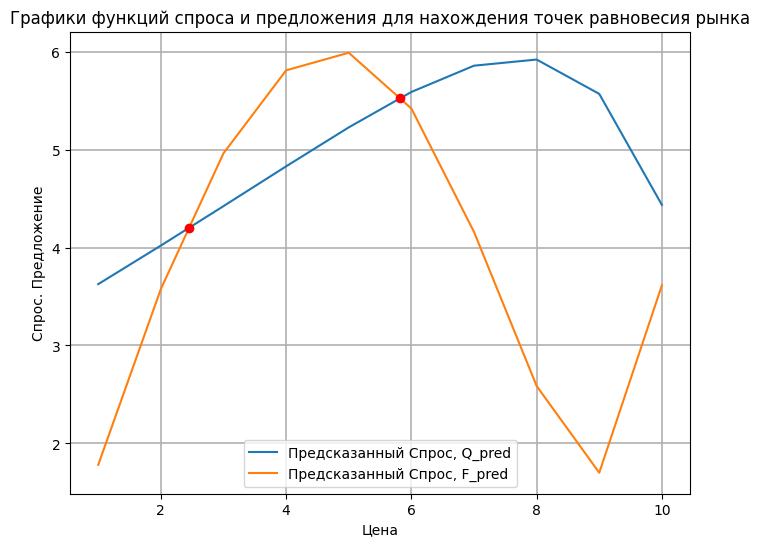

In [109]:

line1 = LineString(np.column_stack((price_pred, query_pred)))
line2 = LineString(np.column_stack((price_pred, supply_pred)))
intersection = line2.intersection(line1)

list_point = [el for el in map(lambda x: x.coords[0], intersection.geoms)]

print(min(intersection.geoms, key = lambda x: x.coords[0][1]))
for i in range(len(list_point)):
  ax.plot(list_point[i][0], list_point[i][1], 'ro')


fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Графики функций спроса и предложения для нахождения точек равновесия рынка')
ax.set_xlabel('Цена')
ax.set_ylabel('Спрос. Предложение')

ax.grid(which='major', linewidth=1.2)

ax.plot(price_pred, query_pred, label='Предсказанный Спрос, Q_pred')
ax.plot(price_pred, supply_pred, label='Предсказанный Спрос, F_pred')
for i in range(len(list_point)):
  ax.plot(list_point[i][0], list_point[i][1], 'ro')

ax.legend()
plt.show()

Найдем точки пересечения графиков F_pred и Q_pred

array([[ 1.  ,  2.55],
       [ 2.  ,  4.66],
       [ 3.  ,  5.89],
       [ 4.  ,  4.62],
       [ 5.  ,  3.35],
       [ 6.  ,  7.55],
       [ 7.  ,  4.12],
       [ 8.  ,  6.45],
       [ 9.  ,  5.95],
       [10.  ,  4.27]])

In [36]:
from math import sqrt
import numpy as np

def seidel(A, b, eps):
    n = len(A)
    x = [.0 for i in range(n)]

    converge = False
    while not converge:
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        converge = np.max(np.abs(x_new - x)) <= eps
        x = x_new

    return x

##A = np.array([[10, 1, 1], [2, 10, 2], [1, 1, 10]])
#b = np.array([12, 14, 10])
x = np.array(0)

x = seidel(A, b, x)
print('Solution:')
print(x)

Solution:
[ 2.278  1.011 -0.075 -0.   ]


In [54]:
times = 10000
k = 0
eps = 0.01



price_pred = price
query_pred = np.zeros(len(query))
for i in range(len(query_pred)):
  query_pred[i] = sum([x[j]*price_pred[i]**(j) for j in range(len(x))])

A = np.zeros((m,m)) # price, то есть известный x 
for i in range(m):
  for j in range(m):
    A[i][j] = A_price(data[0], i+j)

b = np.zeros(m) # Q - свободные члены
for i in range(m):
  b[i] = b_query(data[2], data[0], i)

x = np.zeros(m)
times = 10000
k = 0
eps = 0.01

converge = False
#x_new = x
while not converge:
  x_new = np.copy(x)
  for i in range(m):
    s1 = sum(A[i][j] * x_new[j] for j in range(i))
    #print((b[i] - s1) / A[i][i])
    s2 = sum(A[i][j] * x[j] for j in range(i + 1, m))
    x_new[i] = (b[i] - s1 - s2) / A[i][i]
  converge = np.max(np.abs(x_new - x)) <= eps
  #print(converge)
  #print(np.max(np.abs(x_new - x)))
  x = x_new
  k += 1
  if k >= times:
    break
  
print(x)
print(k)

supply_pred = np.zeros(len(supply))
for i in range(len(supply_pred)):
  supply_pred[i] = sum([x[j]*price_pred[i]**(j) for j in range(len(x))])


[ 3.24287  0.37806  0.00531  0.00004 -0.00002 -0.      -0.      -0.
 -0.      -0.     ]
25
[-0.30911  2.20752 -0.10184 -0.0135  -0.00082 -0.00003  0.       0.
  0.       0.     ]
162
